In [2]:
from netCDF4 import Dataset
import numpy as np
import datetime
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy
import tqdm
import warnings
warnings.filterwarnings("ignore")

### load common files

In [15]:
datapath = '/Users/carmennab/Dropbox/alpha_retracker/data/'
icetypes = np.array(Dataset(datapath+'auxiliary/icetype_01012010-30042021.nc')['Ice Type'])

ease_lats = np.asarray(Dataset(datapath+'snow/SMLG_ERA5_01Jan2010-31Jul2021.nc')['Latitude'])
ease_lons = np.asarray(Dataset(datapath+'snow/SMLG_ERA5_01Jan2010-31Jul2021.nc')['Longitude'])

### load buoy grid cell locations

In [17]:
### ULS_A
a_days = [np.arange(272,575), # 30/09/10 - 30/07/11 
        np.arange(575,954), # 31/07/11 - 12/08/12 
        np.arange(956,1322), # 14/08/12 - 14/08/13
        np.arange(1322,1735), # 15/08/13 - 01/10/14
        np.arange(1735,2105), # 02/10/14 - 06/10/15
        np.arange(2107,2472), # 09/10/15 - 07/10/16
        np.arange(2473,2821), # 09/10/16 - 21/09/17
        np.arange(2824,3190), # 25/09/17 - 25/09/18
        np.arange(3190,len(ice_type))] # 26/09/18 - 30/04/21
a_x = [237,237,237,237,237,237,237,237,237]
a_y = [147,147,147,147,147,147,147,147,147]

### ULS_B
b_days = [np.arange(276,578), # 04/10/10 - 02/08/11 
        np.arange(579,967), # 03/08/11 - 25/08/12 
        np.arange(972,1329), # 30/08/12 - 21/08/13
        np.arange(1329,1742), # 22/08/13 - 08/10/14
        np.arange(1743,2099), # 10/10/14 - 30/09/15
        np.arange(2107,2469), # 09/10/15 - 04/10/16
        np.arange(2470,2819), # 06/10/16 - 19/09/17
        np.arange(2820,3187), # 21/09/17 - 22/09/18
        np.arange(3188,len(ice_type))] # 24/09/18 - 30/04/21

b_x = [226,224,226,226,226,226,226,225,224]
b_y = [153,154,153,154,154,153,153,154,155]

### ULS_D
d_days = [np.arange(283,587), # 11/10/10 - 12/08/11 
        np.arange(589,964), # 13/08/11 - 22/08/12 
        np.arange(965,1317), # 23/08/12 - 09/08/13
        np.arange(1317,1731), # 10/08/13 - 27/09/14
        np.arange(1732,2111), # 29/09/14 - 12/10/15
        np.arange(2112,2478), # 14/10/15 - 13/10/16
        np.arange(2479,2825), # 15/10/16 - 25/09/17
        np.arange(2827,3179), # 28/09/17 - 14/09/18
        np.arange(3180,len(ice_type))] # 16/09/18 - 30/04/21

d_x = [234,234,234,234,234,234,234,234,233]
d_y = [135,134,134,134,136,135,135,135,135]

### load sit function

In [18]:
def rf_to_sit():
    icetype = np.full((len(icetypes)),np.nan)
    lon = np.full((len(icetypes)),np.nan)
    lat = np.full((len(icetypes)),np.nan)
    
    for days,x,y in zip(buoy_days,buoy_x,buoy_y):

        it = icetypes[days,x,y] 
        
        icetype[days] = icetypes[days,x,y]
        lon[days] = ease_lons[x,y]
        lat[days] = ease_lats[x,y]
        
    data_vars = {'Ice Type':(['t'],icetype),
                'Longitude':(['t'],lon),
                'Latitude':(['t'],lat)}
    ds = xr.Dataset(data_vars = data_vars,
                    coords={'Day':(['t'],np.arange(0,len(ice_type)))},
                    )
    ds.attrs = {'Day': "day since 1 January 2010"}
    ds.to_netcdf(datapath+'icetype/'+buoy+'.nc','w')

### create SIT for each combination

In [19]:
buoys = ['ULS_A','ULS_B','ULS_D']
buoy_dayss = [a_days,b_days,d_days]
buoy_xs = [a_x,b_x,d_x]
buoy_ys = [a_y,b_y,d_y]

for buoy,buoy_days,buoy_x,buoy_y in zip(buoys,buoy_dayss,buoy_xs,buoy_ys):

    rf_to_sit()

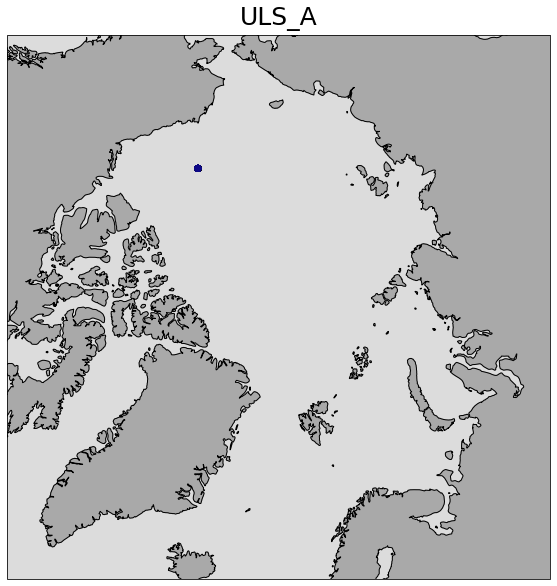

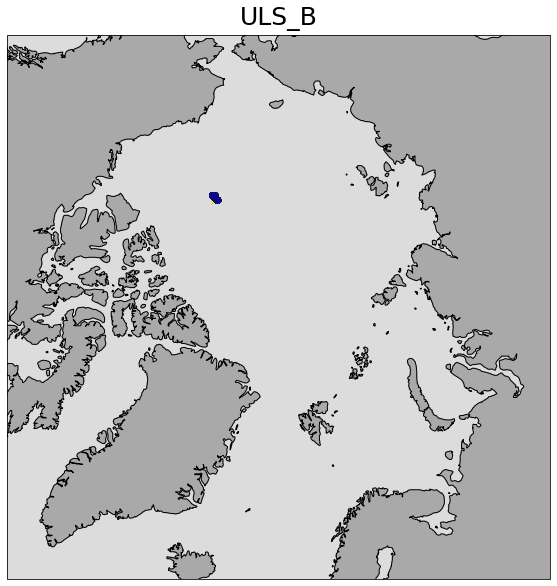

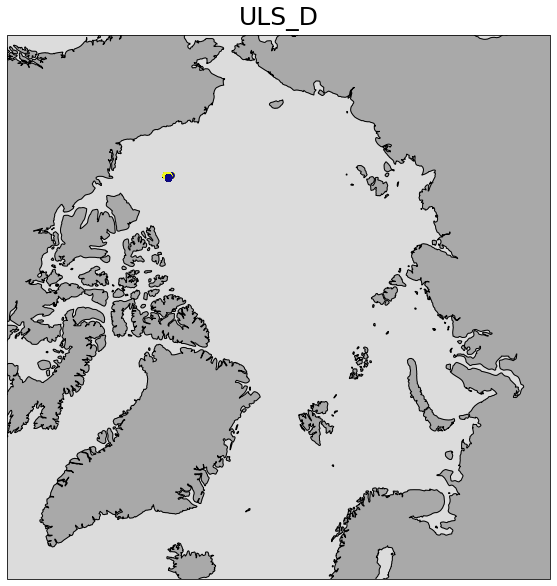

In [21]:
buoys = ['ULS_A','ULS_B','ULS_D']

for counter,buoy in enumerate(buoys):
   fig = plt.figure(figsize=(10,10))
   ax = fig.add_subplot(projection=ccrs.NorthPolarStereo())
   ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
   ax.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
   ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
   ax.coastlines()  
   file = Dataset('/Users/carmennab/Dropbox/alpha_retracker/data/icetype/'+buoy+'.nc')
   sit = np.array(file['Ice Type'])
   lons = np.array(file['Longitude'])
   lats = np.array(file['Latitude'])    
   ax.scatter(lons,lats,c=sit,cmap='plasma',vmin=2,vmax=3,transform=ccrs.PlateCarree())
   ax.set_title(buoy,fontsize=25, pad=10)
   plt.show()